In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = 'scaled_test_data_concatenated_v2.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

,Player,Team,Position 1,Age,Market value,Birth country,Height,Weight,Goals,xG,Assists,xA,Duels per 90,Defensive duels per 90,Aerial duels per 90,Sliding tackles per 90,PAdj Sliding tackles,Shots blocked per 90,Interceptions per 90,PAdj Interceptions,Goals per 90,xG per 90,Shots,Shots per 90,Assists per 90,Crosses per 90,Crosses from left flank per 90,Crosses from right flank per 90,Crosses to goalie box per 90,Dribbles per 90,Progressive runs per 90,Accelerations per 90,Received passes per 90,Received long passes per 90,Passes per 90,Forward passes per 90,Back passes per 90,Lateral passes per 90,Short / medium passes per 90,Long passes per 90,"Average pass length, m","Average long pass length, m",xA per 90,Shot assists per 90,Second assists per 90,Key passes per 90,Passes to final third per 90,Passes to penalty area per 90,Through passes per 90,Deep completions per 90,Deep completed crosses per 90,Progressive passes per 90,Conceded goals,Shots against,xG against,Prevented goals
0,Hugo Bueno,Wolverhampton Wanderers,LB,-1.650487,200000,Spain,-0.386910,-0.419228,-0.713102,-0.786288,-0.248585,0.123993,0.274465,1.140783,-0.420225,-0.795907,-0.792280,-0.485369,0.680353,0.658527,-0.775129,-0.836681,-0.879461,-0.880626,-0.000427,1.212519,2.377928,-0.692687,1.152536,0.601969,1.279085,1.603742,-0.311397,0.926832,-0.134655,-0.183977,1.247338,-0.764395,-0.128952,-0.716033,-0.618716,-0.805065,0.621305,0.715369,-0.700696,0.379533,-0.876449,0.652522,-0.584794,-0.544699,1.193901,-0.432535,-0.263962,-0.267218,-0.264813,-0.004071
1,Jonny Otto,Wolverhampton Wanderers,RB,0.537946,17000000,Spain,-1.131609,-0.840882,-0.421577,-0.744785,-0.772397,-0.669157,0.500522,1.008275,-0.160069,0.735881,0.829384,0.042232,0.986496,1.180549,-0.312703,-0.764705,-0.671599,-0.586100,-0.800904,0.189101,-0.143541,0.426824,-0.466771,0.167828,0.382067,-0.276410,0.726127,0.152623,0.679089,0.785479,0.650510,0.101465,0.745927,-0.235514,-0.486714,0.227251,-0.609626,-0.683748,-0.700696,-0.856546,0.805457,0.001569,-0.459902,-0.544699,-0.175473,0.403404,-0.263962,-0.267218,-0.264813,-0.004071
2,C. Dawson,Wolverhampton Wanderers,CB,1.510582,2500000,England,0.804608,0.283530,-0.421577,-0.163734,-0.772397,-0.848628,-0.713768,-0.543347,0.752843,-0.047033,-0.006787,3.248425,1.180178,1.257886,-0.510885,-0.260869,-0.255875,-0.409384,-0.800904,-0.920254,-0.637105,-0.607391,-0.810260,-0.968005,-0.963461,-1.048262,0.467444,-1.174593,0.562945,1.044118,-0.766520,0.844045,0.480742,1.033859,0.809888,1.146833,-1.019936,-1.024074,-0.700696,-0.968917,0.553378,-1.052353,-0.480717,-0.896424,-0.916282,0.804197,-0.263962,-0.267218,-0.264813,-0.004071
3,Matheus Nunes,Wolverhampton Wanderers,AMF,-0.677850,45000000,Brazil,0.208849,0.283530,-0.421577,0.078903,-0.248585,-0.061268,0.775455,0.503891,-0.254671,0.089126,0.069229,-0.282445,-0.275563,-0.269512,-0.510885,-0.188892,0.263780,-0.091296,-0.343488,0.150039,-0.175730,0.384176,0.072998,0.536343,0.511636,0.891264,-0.169029,-0.179181,-0.178301,-0.838491,0.856433,-0.024716,-0.153060,-0.247527,-0.060900,0.452721,-0.336085,-0.078725,-0.700696,-0.032493,-0.372290,0.195305,-0.147670,-0.421595,-0.018332,-0.783706,-0.263962,-0.267218,-0.264813,-0.004071
4,R. Aït Nouri,Wolverhampton Wanderers,LB,-1.407328,22000000,France,-0.386910,-0.840882,-0.421577,-0.435104,-0.772397,-0.466527,0.793784,1.752028,0.014945,0.565682,0.677353,-1.012970,0.024332,0.180007,-0.246642,-0.188892,-0.619633,-0.362260,-0.800904,0.368785,1.219125,-0.692687,-0.025142,1.293565,0.790708,0.831890,0.258078,2.873416,0.019956,0.169672,0.619098,-0.555544,0.109793,-0.643955,-0.580393,-1.077120,-0.199315,-0.570306,-0.700696,-0.219778,-0.231787,0.575027,-0.126855,0.123580,0.318399,0.246904,-0.263962,-0.267218,-0.264813,-0.004071


In [115]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [116]:
# Convert the 'Position 1' column to dummy variables
df = pd.get_dummies(df, columns=['Position 1'], drop_first=False)

# Display the first few rows of the dataframe with the new dummy variables
df.head()

,Player,Team,Age,Market value,Birth country,Height,Weight,Goals,xG,Assists,xA,Duels per 90,Defensive duels per 90,Aerial duels per 90,Sliding tackles per 90,PAdj Sliding tackles,Shots blocked per 90,Interceptions per 90,PAdj Interceptions,Goals per 90,xG per 90,Shots,Shots per 90,Assists per 90,Crosses per 90,Crosses from left flank per 90,Crosses from right flank per 90,Crosses to goalie box per 90,Dribbles per 90,Progressive runs per 90,Accelerations per 90,Received passes per 90,Received long passes per 90,Passes per 90,Forward passes per 90,Back passes per 90,Lateral passes per 90,Short / medium passes per 90,Long passes per 90,"Average pass length, m","Average long pass length, m",xA per 90,Shot assists per 90,Second assists per 90,Key passes per 90,Passes to final third per 90,Passes to penalty area per 90,Through passes per 90,Deep completions per 90,Deep completed crosses per 90,Progressive passes per 90,Conceded goals,Shots against,xG against,Prevented goals,Position 1_AMF,Position 1_CB,Position 1_CF,Position 1_CM,Position 1_DMF,Position 1_GK,Position 1_LB,Position 1_LW,Position 1_LWB,Position 1_RB,Position 1_RW,Position 1_RWB
0,Hugo Bueno,Wolverhampton Wanderers,-1.650487,200000,Spain,-0.386910,-0.419228,-0.713102,-0.786288,-0.248585,0.123993,0.274465,1.140783,-0.420225,-0.795907,-0.792280,-0.485369,0.680353,0.658527,-0.775129,-0.836681,-0.879461,-0.880626,-0.000427,1.212519,2.377928,-0.692687,1.152536,0.601969,1.279085,1.603742,-0.311397,0.926832,-0.134655,-0.183977,1.247338,-0.764395,-0.128952,-0.716033,-0.618716,-0.805065,0.621305,0.715369,-0.700696,0.379533,-0.876449,0.652522,-0.584794,-0.544699,1.193901,-0.432535,-0.263962,-0.267218,-0.264813,-0.004071,False,False,False,False,False,False,True,False,False,False,False,False
1,Jonny Otto,Wolverhampton Wanderers,0.537946,17000000,Spain,-1.131609,-0.840882,-0.421577,-0.744785,-0.772397,-0.669157,0.500522,1.008275,-0.160069,0.735881,0.829384,0.042232,0.986496,1.180549,-0.312703,-0.764705,-0.671599,-0.586100,-0.800904,0.189101,-0.143541,0.426824,-0.466771,0.167828,0.382067,-0.276410,0.726127,0.152623,0.679089,0.785479,0.650510,0.101465,0.745927,-0.235514,-0.486714,0.227251,-0.609626,-0.683748,-0.700696,-0.856546,0.805457,0.001569,-0.459902,-0.544699,-0.175473,0.403404,-0.263962,-0.267218,-0.264813,-0.004071,False,False,False,False,False,False,False,False,False,True,False,False
2,C. Dawson,Wolverhampton Wanderers,1.510582,2500000,England,0.804608,0.283530,-0.421577,-0.163734,-0.772397,-0.848628,-0.713768,-0.543347,0.752843,-0.047033,-0.006787,3.248425,1.180178,1.257886,-0.510885,-0.260869,-0.255875,-0.409384,-0.800904,-0.920254,-0.637105,-0.607391,-0.810260,-0.968005,-0.963461,-1.048262,0.467444,-1.174593,0.562945,1.044118,-0.766520,0.844045,0.480742,1.033859,0.809888,1.146833,-1.019936,-1.024074,-0.700696,-0.968917,0.553378,-1.052353,-0.480717,-0.896424,-0.916282,0.804197,-0.263962,-0.267218,-0.264813,-0.004071,False,True,False,False,False,False,False,False,False,False,False,False
3,Matheus Nunes,Wolverhampton Wanderers,-0.677850,45000000,Brazil,0.208849,0.283530,-0.421577,0.078903,-0.248585,-0.061268,0.775455,0.503891,-0.254671,0.089126,0.069229,-0.282445,-0.275563,-0.269512,-0.510885,-0.188892,0.263780,-0.091296,-0.343488,0.150039,-0.175730,0.384176,0.072998,0.536343,0.511636,0.891264,-0.169029,-0.179181,-0.178301,-0.838491,0.856433,-0.024716,-0.153060,-0.247527,-0.060900,0.452721,-0.336085,-0.078725,-0.700696,-0.032493,-0.372290,0.195305,-0.147670,-0.421595,-0.018332,-0.783706,-0.263962,-0.267218,-0.264813,-0.004071,True,False,False,False,False,False,False,False,False,False,False,False
4,R. Aït Nouri,Wolverhampton Wanderers,-1.407328,22000000,France,-0.386910,-0.840882,-0.421577,-0.435104,-0.772397,-0.466527,0.793784,1.752028,0.014945,0.565682,0.677353,-1.012970,0.024332,0.180007,-0.246642,-0.188892,-0.619633,-0.362260,-0.800904,0.368785,1.219125,-0.692687,-0.025142,1.293565,0.790708,0.831890,0.258078,2.873416,0.019956,0.169672,0.619098,-0.555544,0.109793,-0.643955,

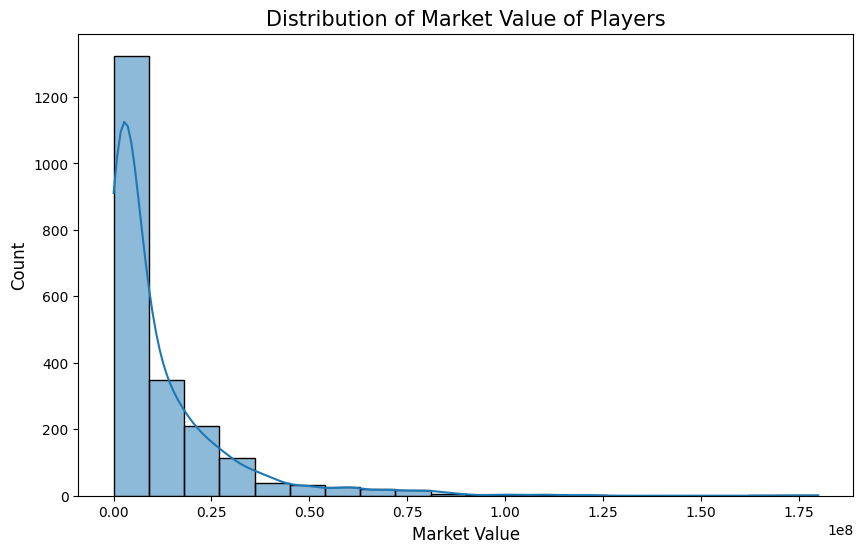

In [117]:
# Distribution of Market Value of Players

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Market value', bins=20, kde=True)
plt.title('Distribution of Market Value of Players', fontsize=15)
plt.xlabel('Market Value', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

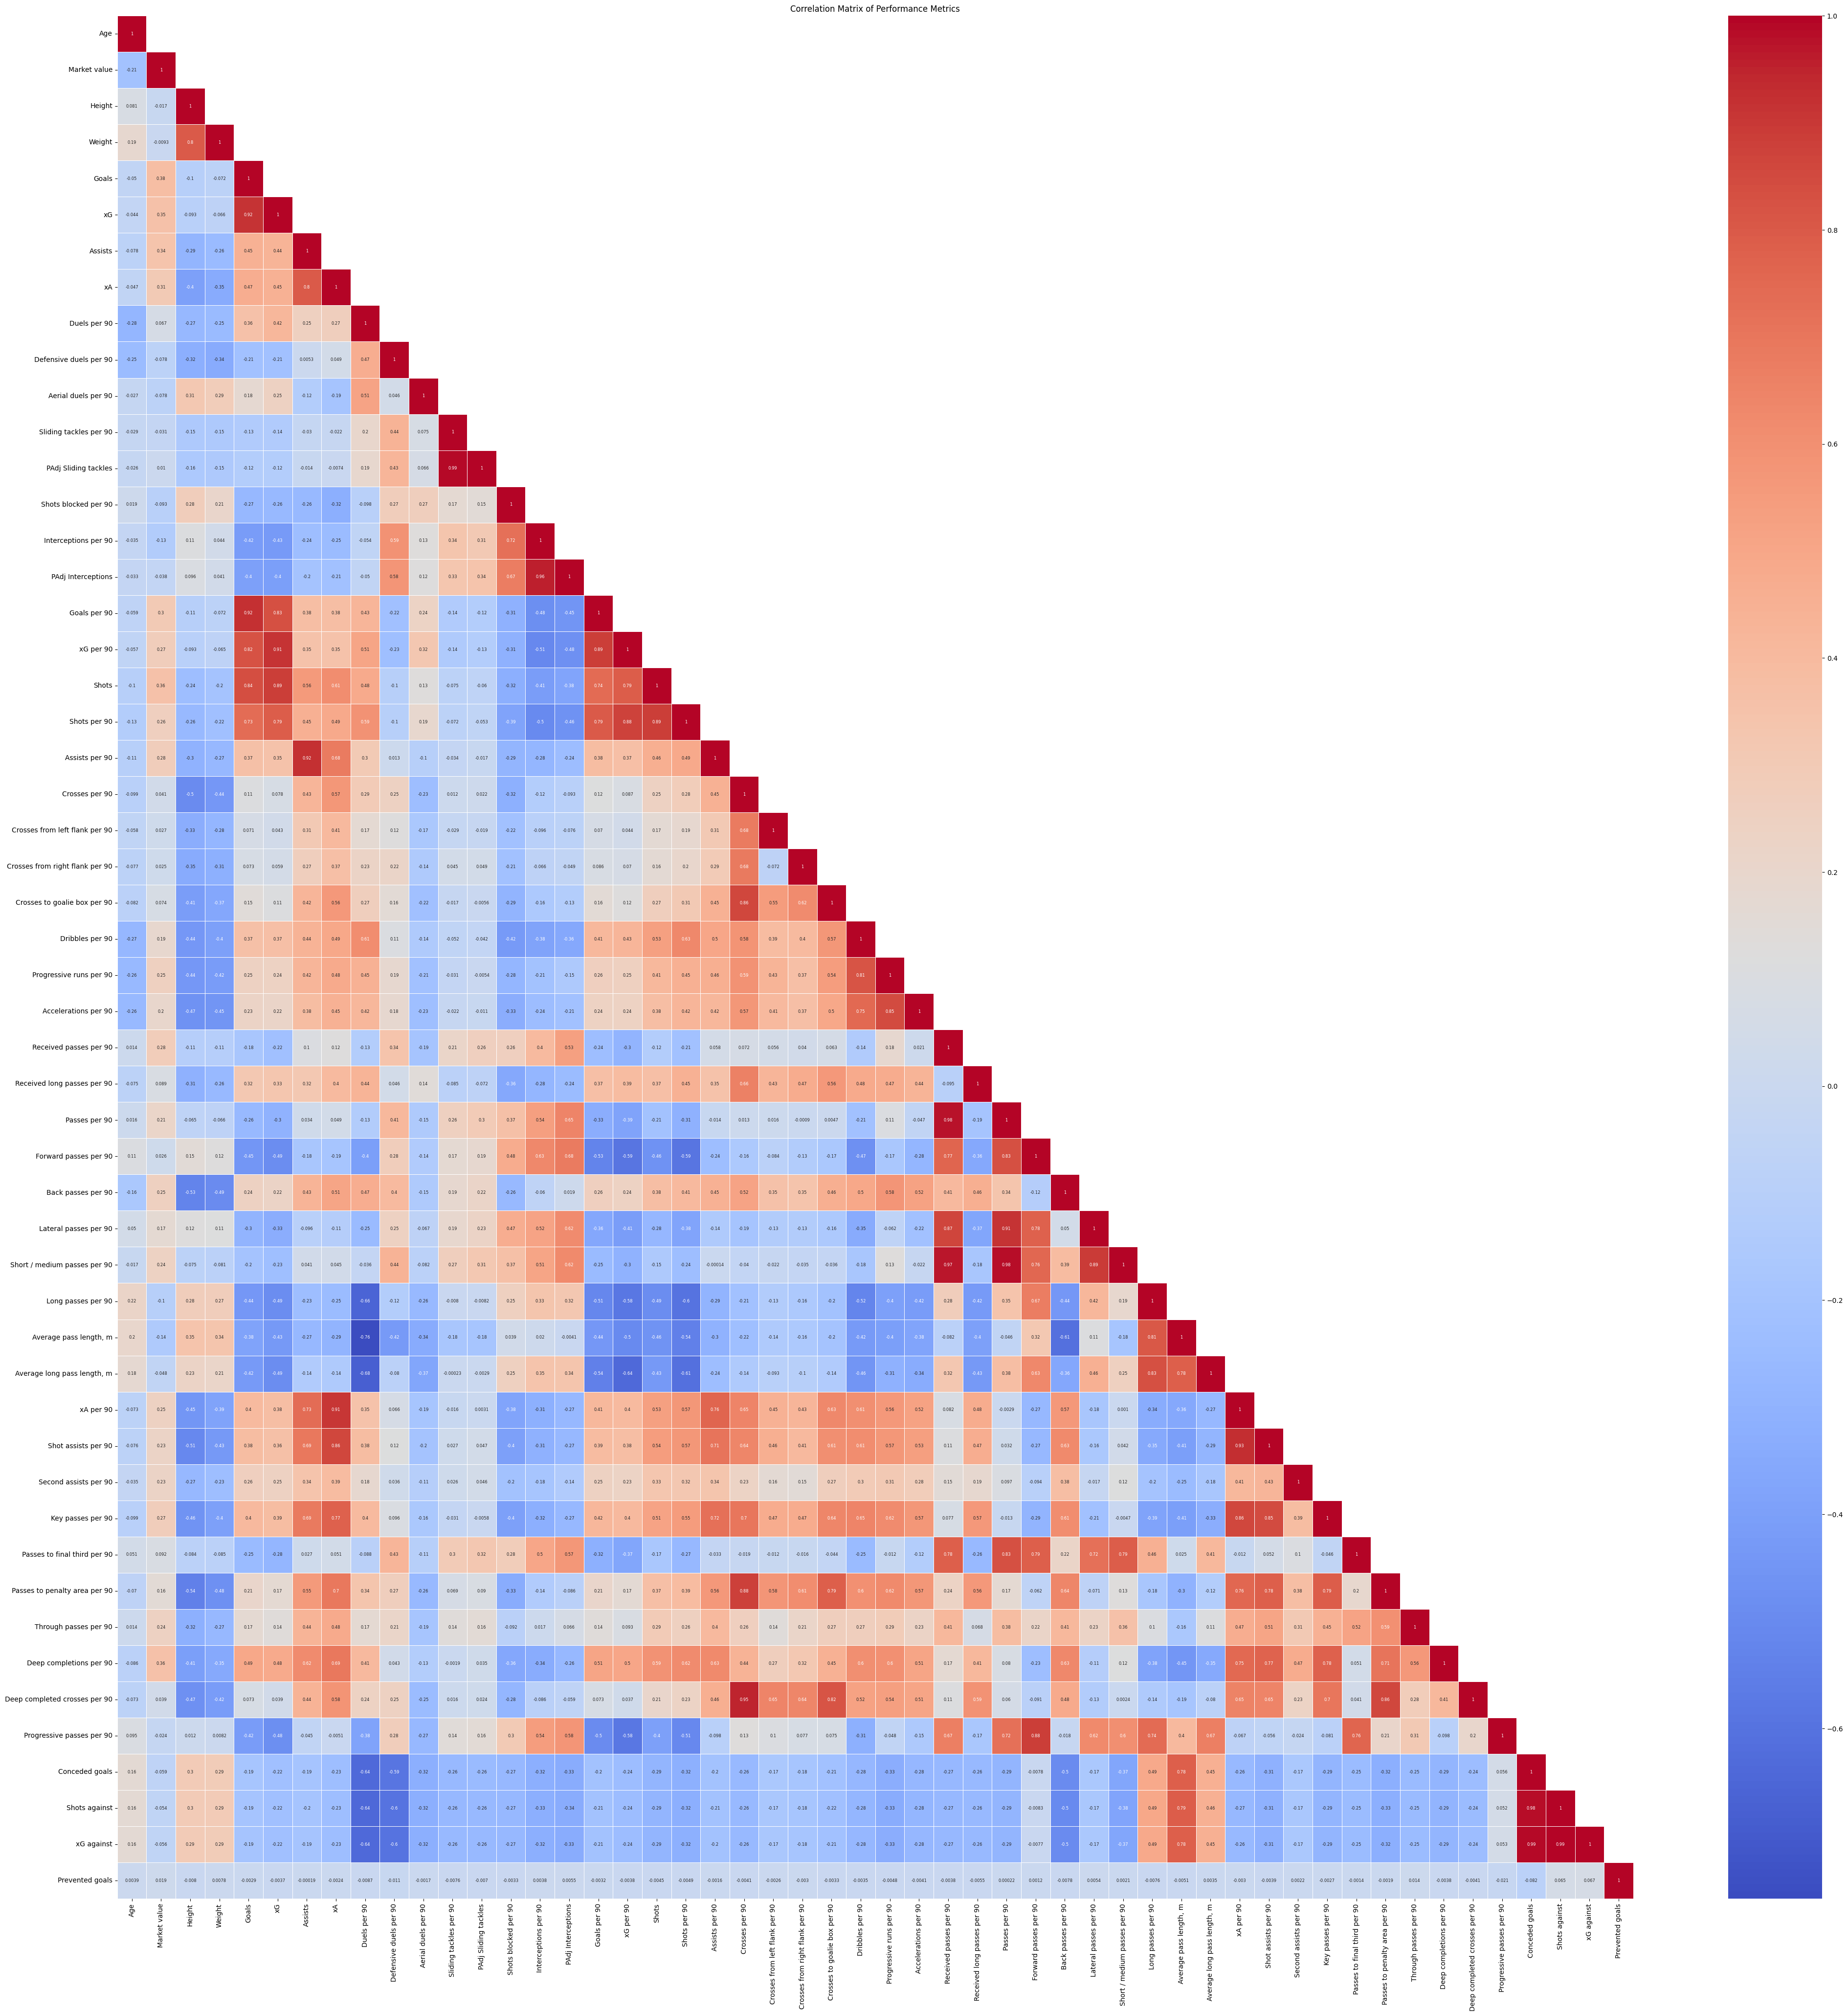

In [118]:
# Step 1: Select only numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Step 2: Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Step 3: Plot the correlation matrix
plt.figure(figsize=(50,50))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, mask=mask, annot_kws={"size": 6})
plt.title('Correlation Matrix of Performance Metrics')
plt.show()

In [119]:
# Define X after initial preprocessing
X = df.drop(['Player', 'Team', 'Market value', 'Birth country'], axis=1)

In [120]:
# Step 1: Ensure only numeric data
X = X.select_dtypes(include=[np.number])

# Step 2: Handle missing values - For demonstration, we'll fill NaN values with the mean of the column.
# Alternatively, rows with NaN values can be dropped or other imputation methods can be used.
X = X.fillna(X.mean())

# Step 3: Check for infinite values and replace them if any
X = X.replace([np.inf, -np.inf], np.nan).fillna(X.mean())

# Now, let's attempt to calculate the VIF again

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF for each feature
vif_data.sort_values(by='VIF', ascending=False).head(10)

,Feature,VIF
47,Conceded goals,199921.318204
49,xG against,199519.205488
29,Passes per 90,46828.770004
33,Short / medium passes per 90,42437.219888
50,Prevented goals,4404.051515
20,Crosses per 90,2373.072616
34,Long passes per 90,1601.880759
22,Crosses from right flank per 90,1075.540287
21,Crosses from left flank per 90,1060.410438
11,PAdj Sliding tackles,94.725789


In [121]:
# Remove features with high VIF values one by one until all remaining features have a VIF less than 10
while vif_data['VIF'].max() > 10:
    remove = vif_data.sort_values('VIF', ascending=False).iloc[0]
    X = X.drop(remove['Feature'], axis=1)
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [122]:
# Display the remaining features and their VIF values
vif_data.sort_values(by='VIF', ascending=False)

,Feature,VIF
10,xG per 90,9.929099
11,Shots per 90,8.393144
20,Forward passes per 90,8.123303
25,Shot assists per 90,7.915311
17,Progressive runs per 90,7.400204
28,Passes to final third per 90,6.524712
16,Dribbles per 90,6.203445
27,Key passes per 90,6.173974
23,Long passes per 90,5.638547
4,xA,5.343579


In [123]:
pd.set_option('display.max_columns', None)

X.head()

,Age,Height,Weight,Goals,xA,Defensive duels per 90,Aerial duels per 90,Sliding tackles per 90,Shots blocked per 90,PAdj Interceptions,xG per 90,Shots per 90,Assists per 90,Crosses from left flank per 90,Crosses from right flank per 90,Crosses to goalie box per 90,Dribbles per 90,Progressive runs per 90,Accelerations per 90,Received long passes per 90,Forward passes per 90,Back passes per 90,Lateral passes per 90,Long passes per 90,"Average long pass length, m",Shot assists per 90,Second assists per 90,Key passes per 90,Passes to final third per 90,Through passes per 90,Deep completions per 90,xG against,Prevented goals
0,-1.650487,-0.386910,-0.419228,-0.713102,0.123993,1.140783,-0.420225,-0.795907,-0.485369,0.658527,-0.836681,-0.880626,-0.000427,2.377928,-0.692687,1.152536,0.601969,1.279085,1.603742,0.926832,-0.183977,1.247338,-0.764395,-0.716033,-0.805065,0.715369,-0.700696,0.379533,-0.876449,-0.584794,-0.544699,-0.264813,-0.004071
1,0.537946,-1.131609,-0.840882,-0.421577,-0.669157,1.008275,-0.160069,0.735881,0.042232,1.180549,-0.764705,-0.586100,-0.800904,-0.143541,0.426824,-0.466771,0.167828,0.382067,-0.276410,0.152623,0.785479,0.650510,0.101465,-0.235514,0.227251,-0.683748,-0.700696,-0.856546,0.805457,-0.459902,-0.544699,-0.264813,-0.004071
2,1.510582,0.804608,0.283530,-0.421577,-0.848628,-0.543347,0.752843,-0.047033,3.248425,1.257886,-0.260869,-0.409384,-0.800904,-0.637105,-0.607391,-0.810260,-0.968005,-0.963461,-1.048262,-1.174593,1.044118,-0.766520,0.844045,1.033859,1.146833,-1.024074,-0.700696,-0.968917,0.553378,-0.480717,-0.896424,-0.264813,-0.004071
3,-0.677850,0.208849,0.283530,-0.421577,-0.061268,0.503891,-0.254671,0.089126,-0.282445,-0.269512,-0.188892,-0.091296,-0.343488,-0.175730,0.384176,0.072998,0.536343,0.511636,0.891264,-0.179181,-0.838491,0.856433,-0.024716,-0.247527,0.452721,-0.078725,-0.700696,-0.032493,-0.372290,-0.147670,-0.421595,-0.264813,-0.004071
4,-1.407328,-0.386910,-0.840882,-0.421577,-0.466527,1.752028,0.014945,0.565682,-1.012970,0.180007,-0.188892,-0.362260,-0.800904,1.219125,-0.692687,-0.025142,1.293565,0.790708,0.831890,2.873416,0.169672,0.619098,-0.555544,-0.643955,-1.077120,-0.570306,-0.700696,-0.219778,-0.231787,-0.126855,0.123580,-0.264813,-0.004071


In [124]:
# Calculate the correlation matrix of the features
correlation_matrix = df.drop(['Player', 'Team', 'Market value', 'Birth country'], axis=1).corr()

# Remove one of the two features if their correlation exceeds a threshold
threshold = 0.932    #set at 0.932 just to include every position, otherwise GK gets dropped and unable to see coefficient later on.
to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            to_drop.add(correlation_matrix.columns[i])
X = df.drop(['Player', 'Team', 'Market value', 'Birth country'] + list(to_drop), axis=1)

# Display the remaining features
X.columns

Index(['Age', 'Height', 'Weight', 'Goals', 'xG', 'Assists', 'xA',
       'Duels per 90', 'Defensive duels per 90', 'Aerial duels per 90',
       'Sliding tackles per 90', 'Shots blocked per 90',
       'Interceptions per 90', 'Goals per 90', 'xG per 90', 'Shots',
       'Shots per 90', 'Assists per 90', 'Crosses per 90',
       'Crosses from left flank per 90', 'Crosses from right flank per 90',
       'Crosses to goalie box per 90', 'Dribbles per 90',
       'Progressive runs per 90', 'Accelerations per 90',
       'Received passes per 90', 'Received long passes per 90',
       'Forward passes per 90', 'Back passes per 90', 'Lateral passes per 90',
       'Long passes per 90', 'Average pass length, m',
       'Average long pass length, m', 'xA per 90', 'Shot assists per 90',
       'Second assists per 90', 'Key passes per 90',
       'Passes to final third per 90', 'Passes to penalty area per 90',
       'Through passes per 90', 'Deep completions per 90',
       'Progressive passes pe

In [135]:
# Split the data into training and testing sets
y = df['Market value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the R-squared and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Display the results
r2, rmse

(0.3921118054019136, 12947969.742708651)

In [136]:
# Display the coefficients of the features
coefficients = pd.DataFrame()
coefficients['Feature'] = X.columns
coefficients['Coefficient'] = model.coef_
coefficients.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
49,Position 1_GK,2.775099e+19
48,Position 1_DMF,2.775099e+19
50,Position 1_LB,2.775099e+19
45,Position 1_CB,2.775099e+19
55,Position 1_RWB,2.775099e+19
53,Position 1_RB,2.775099e+19
47,Position 1_CM,2.775099e+19
51,Position 1_LW,2.775099e+19
52,Position 1_LWB,2.775099e+19
46,Position 1_CF,2.775099e+19


Performance Metrics

In [139]:
# Select only the performance metrics as features
performance_metrics = ['Goals', 'Assists', 'xA', 'Duels per 90', 'Defensive duels per 90', 'Aerial duels per 90',
                      'Sliding tackles per 90', 'Shots blocked per 90', 'Interceptions per 90', 'Shots', 'Shots per 90',
                      'Crosses per 90', 'Crosses from left flank per 90', 'Crosses from right flank per 90',
                      'Crosses to goalie box per 90', 'Dribbles per 90', 'Progressive runs per 90', 'Accelerations per 90',
                      'Received passes per 90', 'Received long passes per 90', 'Forward passes per 90', 'Back passes per 90',
                      'Long passes per 90', 'Average pass length, m', 'Average long pass length, m', 'Second assists per 90',
                      'Key passes per 90', 'Passes to final third per 90', 'Passes to penalty area per 90', 'Through passes per 90',
                      'Deep completions per 90', 'Progressive passes per 90', 'Conceded goals', 'Prevented goals']
X_performance = X[performance_metrics]

# Split the data into training and testing sets
X_train_performance, X_test_performance, y_train, y_test = train_test_split(X_performance, y, test_size=0.2, random_state=42)

# Create a linear regression model
model_performance = LinearRegression()
model_performance.fit(X_train_performance, y_train)

# Make predictions on the testing set
y_pred_performance = model_performance.predict(X_test_performance)

# Calculate the R-squared and RMSE
r2_performance = r2_score(y_test, y_pred_performance)
rmse_performance = np.sqrt(mean_squared_error(y_test, y_pred_performance))

# Display the results
r2_performance, rmse_performance

(0.3313034597699107, 13580143.505903002)

In [140]:
# Coefficients for performance metrics

coefficients_performance = pd.DataFrame()
coefficients_performance['Feature'] = X_performance.columns
coefficients_performance['Coefficient'] = model_performance.coef_
coefficients_performance.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
18,Received passes per 90,9.632364e+06
11,Crosses per 90,4.796565e+06
0,Goals,4.727492e+06
9,Shots,2.504843e+06
26,Key passes per 90,2.293287e+06
32,Conceded goals,2.239210e+06
8,Interceptions per 90,2.191752e+06
30,Deep completions per 90,2.057636e+06
22,Long passes per 90,2.010585e+06
15,Dribbles per 90,1.963381e+06


In [98]:
# List of Top Performance Metrics

performance_metrics = ['xG per 90', 'Goals per 90', 'xG', 'Goals', 'Shots', 'Shots per 90', 'Shot assists per 90', 'Second assists per 90', 'Key passes per 90']


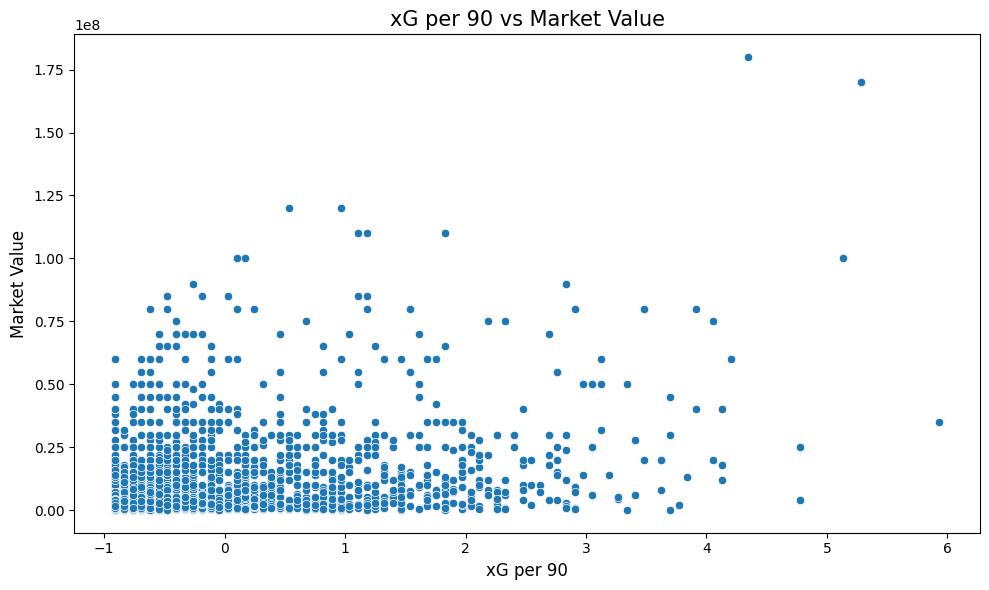

In [99]:
# Visualize the relationship between 'xG per 90' and 'Market value'
metric = performance_metrics[0]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=metric, y='Market value')
plt.title(f'{metric} vs Market Value', fontsize=15)
plt.xlabel(metric, fontsize=12)
plt.ylabel('Market Value', fontsize=12)
plt.tight_layout()
plt.show()

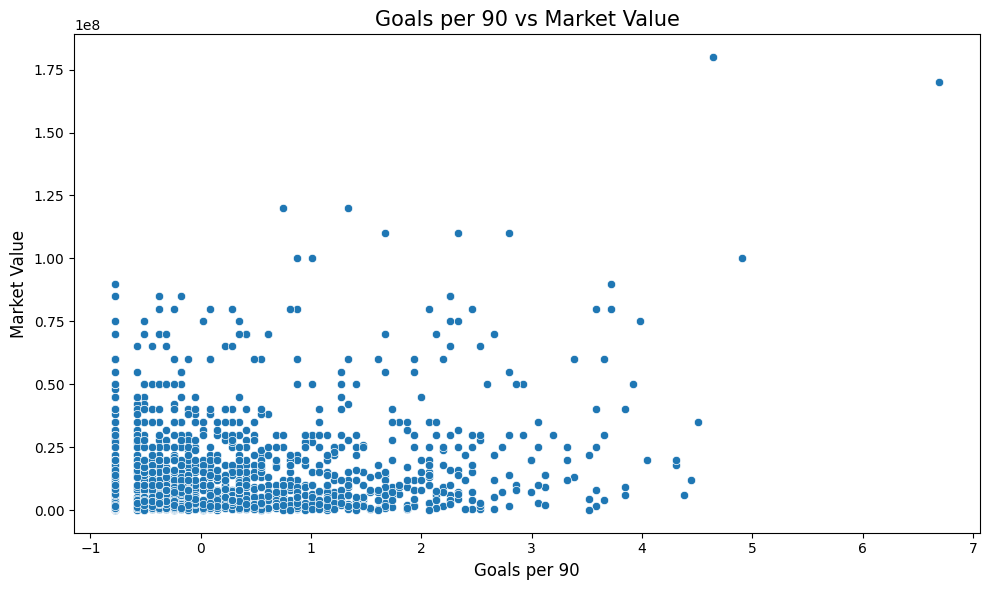

In [100]:
# Visualize the relationship between 'Goals per 90' and 'Market value'
metric = performance_metrics[1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=metric, y='Market value')
plt.title(f'{metric} vs Market Value', fontsize=15)
plt.xlabel(metric, fontsize=12)
plt.ylabel('Market Value', fontsize=12)
plt.tight_layout()
plt.show()

Non-performance Metrics

In [101]:
# Select only the non-performance metrics as features
non_performance_metrics = ['Age', 'Height', 'Weight', 'Position 1_CB', 'Position 1_CF', 'Position 1_CM',
                           'Position 1_DMF', 'Position 1_LB', 'Position 1_LW', 'Position 1_LWB', 'Position 1_RB',
                           'Position 1_RW', 'Position 1_RWB', 'Position 1_AMF', 'Position 1_GK']
X_non_performance = X[non_performance_metrics]

# Split the data into training and testing sets
X_train_non_performance, X_test_non_performance, y_train, y_test = train_test_split(X_non_performance, y, test_size=0.2, random_state=42)

# Create a linear regression model
model_non_performance = LinearRegression()
model_non_performance.fit(X_train_non_performance, y_train)

# Make predictions on the testing set
y_pred_non_performance = model_non_performance.predict(X_test_non_performance)

# Calculate the R-squared and RMSE
r2_non_performance = r2_score(y_test, y_pred_non_performance)
rmse_non_performance = np.sqrt(mean_squared_error(y_test, y_pred_non_performance))

# Display the results
r2_non_performance, rmse_non_performance

(0.0701736557310606, 16013665.204292258)

In [102]:
# Display the coefficients of the non-performance metrics
coefficients_non_performance = pd.DataFrame()
coefficients_non_performance['Feature'] = X_non_performance.columns
coefficients_non_performance['Coefficient'] = model_non_performance.coef_
coefficients_non_performance.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
8,Position 1_LW,4.263271e+06
4,Position 1_CF,3.014537e+06
13,Position 1_AMF,2.421240e+06
6,Position 1_DMF,2.127727e+06
11,Position 1_RW,1.746029e+06
2,Weight,1.366365e+06
5,Position 1_CM,-1.901803e+04
1,Height,-3.538147e+05
12,Position 1_RWB,-1.389569e+06
9,Position 1_LWB,-1.925055e+06


The coefficient for age is negative, indicating that as a player gets older, their market value tends to decrease. The coefficient for height is positive, indicating that taller players tend to have higher market values. The coefficient for weight is negative, indicating that heavier players tend to have lower market values. 

The positions with the highest positive coefficients are Left Wing (LW), Center Forward (CF), and Defensive Midfielder (DMF). These positions are associated with higher market values compared to other positions. This could be because players in these positions are more involved in attacking and scoring goals, which are highly valued skills in football.

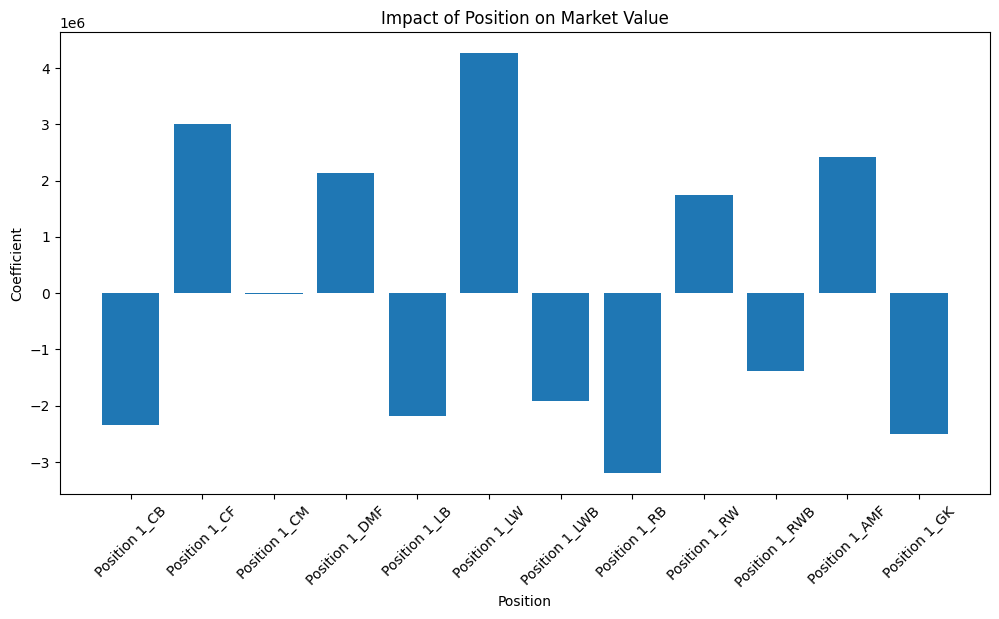

In [103]:
# Select the coefficients of the position dummy variables
position_coefficients = coefficients_non_performance[coefficients_non_performance['Feature'].str.startswith('Position')]

# Create a bar chart to visualize the coefficients of the position dummy variables
plt.figure(figsize=(12, 6))
plt.bar(position_coefficients['Feature'], position_coefficients['Coefficient'])
plt.xlabel('Position')
plt.ylabel('Coefficient')
plt.title('Impact of Position on Market Value')
plt.xticks(rotation=45)
plt.show()

Similar to its coefficient, the birth country of a player can have a significant impact on their market value. Players from countries with a strong footballing tradition and a high level of competition tend to have higher market values.

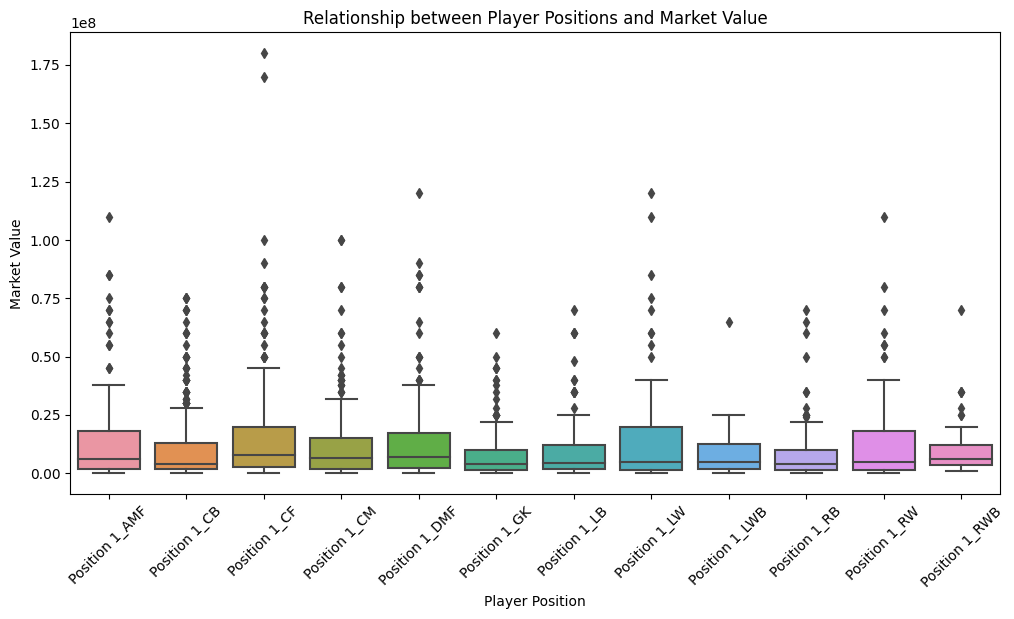

In [104]:
# Identify potential player position columns (assuming they are dummy variables with values of 0 or 1)
potential_positions = df.columns[(df.nunique() == 2) & df.isin([0, 1]).all()].tolist()


# Reshape the dataframe
df_melted = pd.melt(df, id_vars='Market value', value_vars=potential_positions, var_name='Player Position', value_name='Value')

# Filter the melted dataframe to only include rows where the value is 1
df_melted = df_melted[df_melted['Value'] == 1]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted, x='Player Position', y='Market value')
plt.xticks(rotation=45)
plt.title('Relationship between Player Positions and Market Value')
plt.xlabel('Player Position')
plt.ylabel('Market Value')
plt.show()

CF (Center Forward) and Left Wing (LW) players tend to have higher market values compared to other positions which coincides with the Positions coefficients. This could be due to the fact that goal-scoring players are often more highly valued in the football market. 

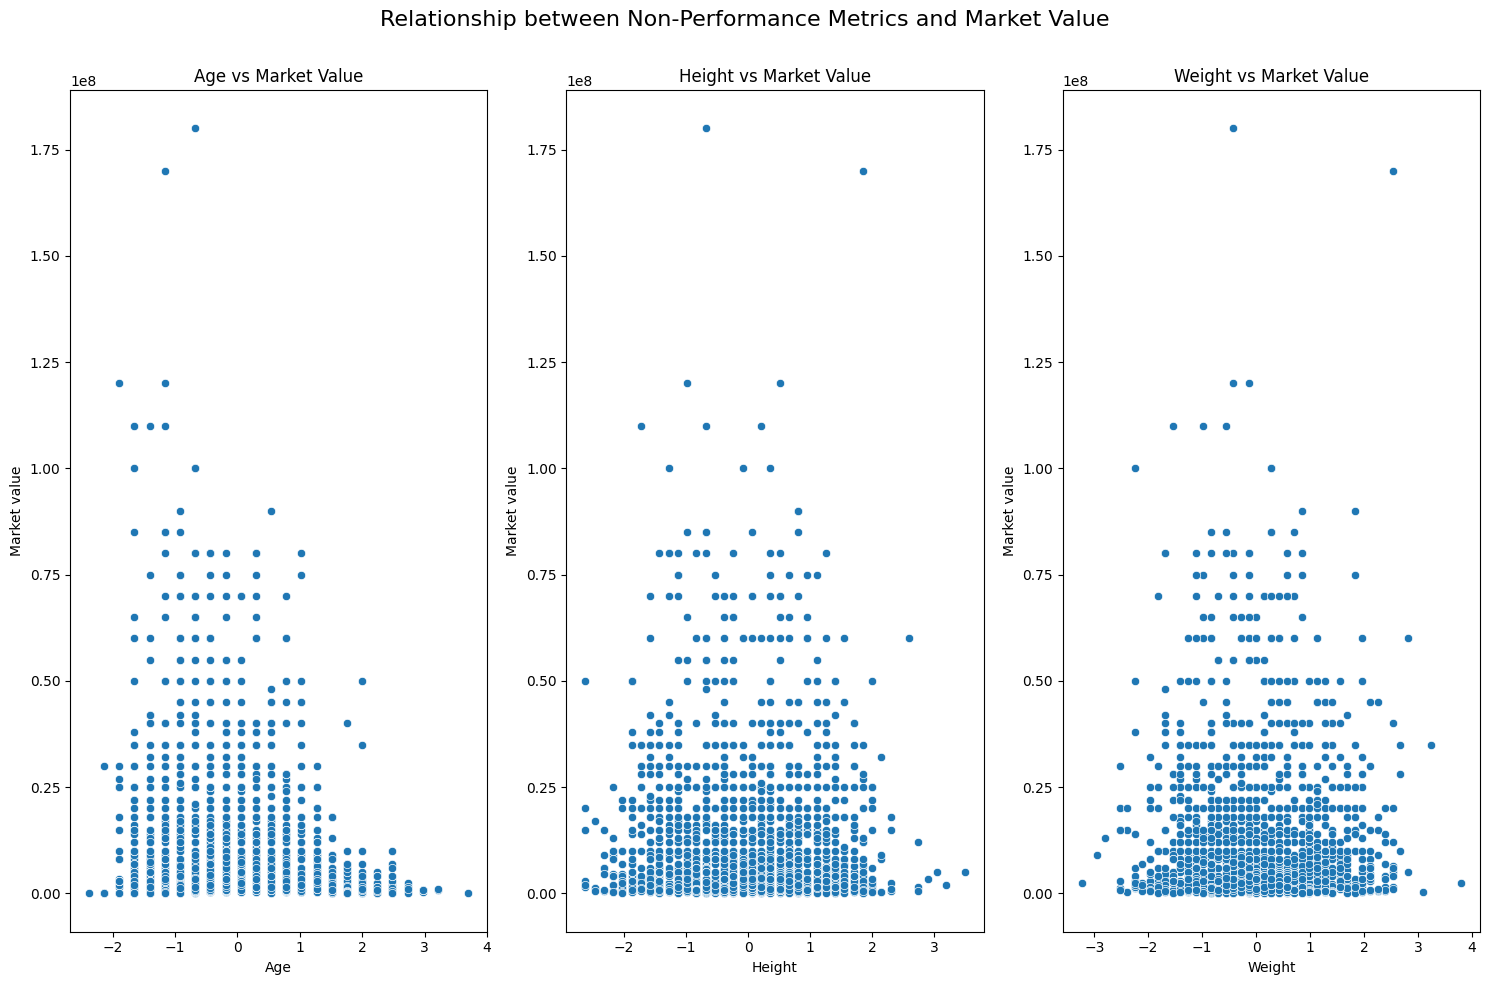

In [105]:
non_performance_metrics = ['Age', 'Height', 'Weight']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))
fig.suptitle('Relationship between Non-Performance Metrics and Market Value', fontsize=16)
for i, metric in enumerate(non_performance_metrics):
    if metric == 'Position 1' or metric == 'Birth country':
        sns.boxplot(data=df, x=metric, y='Market value', ax=axes[i])
    else:
        sns.scatterplot(data=df, x=metric, y='Market value', ax=axes[i])
    axes[i].set_title(f'{metric} vs Market Value')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


The market value of players tends to peak around the age of 25 to 30 years. After that, the market value tends to decrease as the age of the players increases. This trend is consistent with the typical career trajectory of football players, where players tend to reach their peak performance in their late 20s and early 30s, and then their performance and market value decline as they get older.

The scatter plot shows no clear trend between height and market value. This suggests that height may not be a significant factor in determining a player's market value. However, height could be more important for specific positions, such as goalkeepers or center-backs, where height can be an advantage.

The scatter plot shows no clear trend between weight and market value. This suggests that weight may not be a significant factor in determining a player's market value. However, weight could be related to other factors such as height, physical strength, and position.

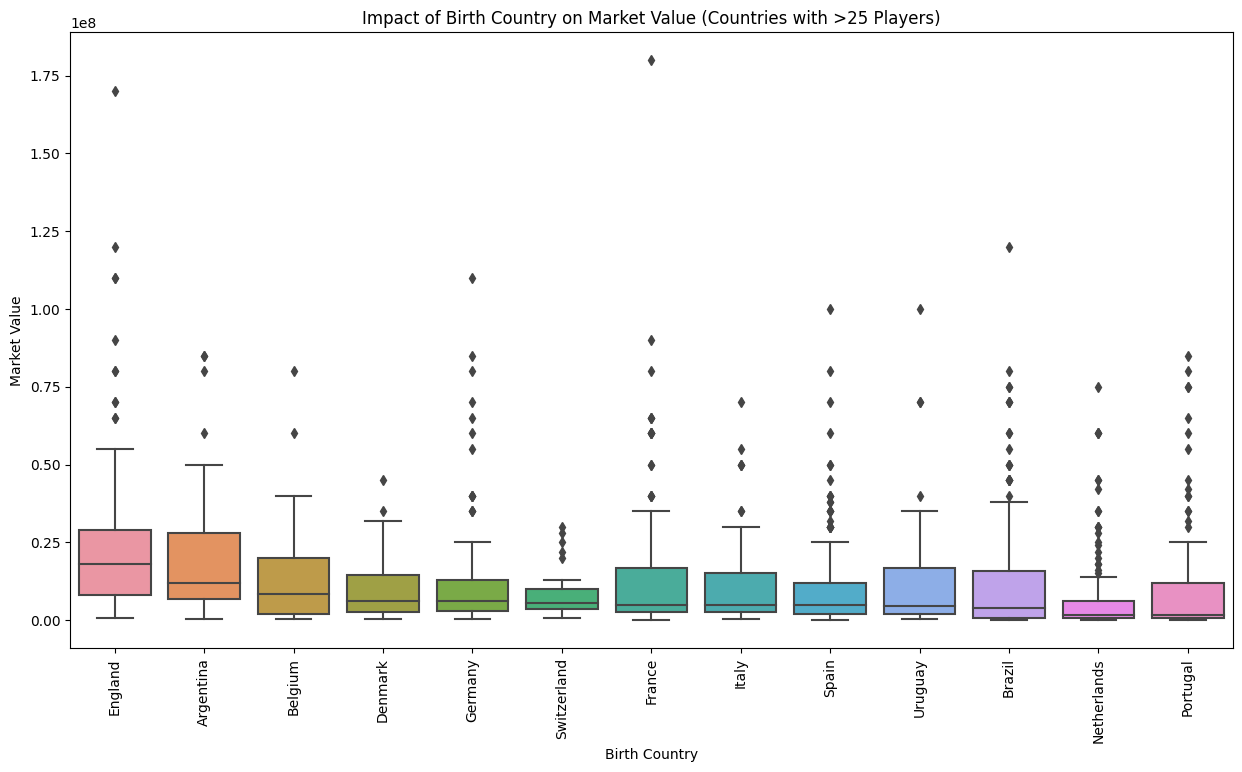

In [106]:
#filter df

filtered_df = df.groupby('Birth country').filter(lambda x: len(x) > 25)


# Calculate median market value for each birth country in the filtered dataframe
median_values = filtered_df.groupby('Birth country')['Market value'].median().sort_values(ascending=False)

# Sort the birth countries by median market value in descending order
ordered_countries = median_values.index

# Create the boxplot, ordered by highest to lowest median market value
plt.figure(figsize=(15, 8))
sns.boxplot(data=filtered_df, x='Birth country', y='Market value', order=ordered_countries)
plt.xlabel('Birth Country')
plt.ylabel('Market Value')
plt.title('Impact of Birth Country on Market Value (Countries with >25 Players)')
plt.xticks(rotation=90)
plt.show()

There is a wide variation in the market value of players from different birth countries. Some countries have a higher median market value, while others have a lower median market value. These are countries with less premier league players.
 

The spread of market values within each country is also quite diverse. Some countries have a wide range of market values, while others have a more narrow range. This depends with the number of players in the premier league.

The presence of outliers in some countries indicates that there are players with exceptionally high or low market values compared to the rest of the players from their birth country.

In [159]:
# Filter countries with more than 20 players
countries_count = df['Birth Country'].value_counts()
countries_to_include = countries_count[countries_count > 20].index

filtered_df = df[df['Birth Country'].isin(countries_to_include)]

# Box plot code
plt.figure(figsize=(20, 10))
sns.boxplot(x='Birth Country', y='Market value', data=filtered_df, order=filtered_df.groupby('Birth Country')['Market value'].median().sort_values(ascending=False).index)
plt.xlabel('Birth Country')
plt.ylabel('Market Value')
plt.title('Distribution of Market Value by Birth Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

KeyError: 'Birth Country'